In [164]:
import pandas as pd
import matplotlib.pyplot as plt

In [165]:
balls_df = pd.read_csv('CSV/BallsInfo.csv')

In [166]:
balls_df

,Match ID,Innings No,Over,Ball,Batting Team,Bowling Team,Batsman,Non Striker,Bowler,Total Runs,Runs Bat,Extras,Wides,Leg Byes,Byes,No Balls,Penalty,Wicket,Player Dismissed
0,1175356,1,0,1,Royal Challengers Bangalore,Chennai Super Kings,V Kohli,PA Patel,DL Chahar,1,1,0,0,0,0,0,0,NaN,NaN
1,1175356,1,0,2,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,0,0,0,0,0,0,NaN,NaN
2,1175356,1,0,3,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,0,0,0,0,0,0,NaN,NaN
3,1175356,1,0,4,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,0,0,0,0,0,0,NaN,NaN
4,1175356,1,0,5,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,4,4,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14288,1181768,2,19,2,Chennai Super Kings,Mumbai Indians,RA Jadeja,SR Watson,SL Malinga,1,1,0,0,0,0,0,0,NaN,NaN
14289,1181768,2,19,3,Chennai Super Kings,Mumbai Indians,SR Watson,RA Jadeja,SL Malinga,2,2,0,0,0,0,0,0,NaN,NaN
14290,1181768,2,19,4,Chennai Super Kings,Mumbai Indians,SR Watson,RA Jadeja,SL Malinga,1,1,0,0,0,0,0,0,run out,SR Watson
14291,1181768,2,19,5,Chennai Super Kings,Mumbai Indians,SN Thakur,RA Jadeja,SL Malinga,2,2,0,0,0,0,0,0,NaN,NaN


<b>Top Scorers In IPL</b>
<br>
Looking at the list of top scorers we find a mix of players from India, Australia, West Indies, England and South Africa, surprisingly no player from New Zealand made it into the list considering how Kane Williamson was the top scorer for IPL 2018. David Warner is the list topper here and it was an important season for him, since he was making a return to IPL after the sandpaper gate controversy. Johnny Bairstow also had a decent season and was able to make it into the list besides only getting a chance in 10 matches. Players from each of the franchises made an appearence in the list excpet RR and CSK, probably because of a bit average season for their openers. While most of the players in the list are openers or top order batsman, Andre Russell and Rishabh Pant make an exception to the list, while Russell was able to keep KRK's hope alive for a fairly long time, Rishabh Pant made a big name for himself and was labelled as the next big player for the Indian Cricket Team.

In [167]:
# Goal: Get the runs, balls and innings played for each player
# Filter out the wide deliveries (since they're not counted under balls faced by a batsman)
# Group the dataset by Batsman
# Used named aggregation to apply aggregate operations on specific columns of original dataframe and then give them a new name.
# .agg(**{ 'New Column Name': ('Old Column Name', 'aggregate function') })

runs_innings_balls = (balls_df
                      [balls_df['Wides'] == 0]
                      .groupby(['Batsman'])
                      .agg(**{
                          'Runs Season': ('Runs Bat', 'sum'),
                          'Balls Faced': ('Ball', 'count'),
                          'Innings Played': ('Match ID', 'nunique'),
                      })
                     )
runs_innings_balls

,Runs Season,Balls Faced,Innings Played
Batsman,,,
A Mishra,21,24,4
AB de Villiers,442,287,13
AD Nath,61,57,5
AD Russell,510,249,13
AJ Turner,3,10,4
...,...,...,...
Washington Sundar,1,3,2
Y Prithvi Raj,0,1,1
YK Pathan,40,45,7


In [168]:
# Goal: Get the count of each run value for each player
# Filter out the wide deliveries (since no runs can be scored on it by a batsman)
# Group the dataset by Batsman and Runs Bat
# Select the Ball column from the dataframe
# Count the number of balls (since the data is in groupby form it calculates number of balls per run)
# Unstack the data frame
# Fill the na values as 0
# Convertthe values to int
# Rename the column

balls_per_run_count = (balls_df
                       [balls_df['Wides'] == 0]
                       .groupby(['Batsman', 'Runs Bat'])
                       ['Ball']
                       .count()
                       .unstack(level=1)
                       .fillna(0)
                       .astype(int)
                       .rename(columns=lambda c: f'{c}s')
                      )
balls_per_run_count

Runs Bat,0s,1s,2s,3s,4s,5s,6s
Batsman,,,,,,,
A Mishra,11,9,2,0,2,0,0
AB de Villiers,92,116,20,2,31,0,26
AD Nath,22,27,1,0,5,0,2
AD Russell,96,66,4,0,31,0,52
AJ Turner,7,3,0,0,0,0,0
...,...,...,...,...,...,...,...
Washington Sundar,2,1,0,0,0,0,0
Y Prithvi Raj,1,0,0,0,0,0,0
YK Pathan,18,20,5,0,1,0,1


In [169]:
# Goal: Get the runs scored from each run for each player
# Drop the 0s column from dataframe having balls count
# Multiply the count with the value associated with the run
# Rename the columns

runs_per_run_count = (
    balls_per_run_count
    .drop(columns=['0s'])
    .multiply(list(range(1, 7)), axis='columns')
    .rename(columns=lambda c: f'Runs - {c}')
)

runs_per_run_count

Runs Bat,Runs - 1s,Runs - 2s,Runs - 3s,Runs - 4s,Runs - 5s,Runs - 6s
Batsman,,,,,,
A Mishra,9,4,0,8,0,0
AB de Villiers,116,40,6,124,0,156
AD Nath,27,2,0,20,0,12
AD Russell,66,8,0,124,0,312
AJ Turner,3,0,0,0,0,0
...,...,...,...,...,...,...
Washington Sundar,1,0,0,0,0,0
Y Prithvi Raj,0,0,0,0,0,0
YK Pathan,20,10,0,4,0,6


In [170]:
# Goal: Produce the final dataframe, with all the necessary columns
# Concat the columns
# Assign new columns for percentage value of runs distribution and team name

runs_season = (
    pd.concat(
        [runs_innings_balls, balls_per_run_count, runs_per_run_count], axis='columns', sort=False)
    .assign(**{
        'Dot Ball Percentage': lambda df: 100 * df['0s'] / df['Balls Faced'],
        'Boundary Percentage': lambda df: 100 * (df['4s'] + df['6s']) / df['Balls Faced'],
        'Others Percentage': lambda df: 100 - (df['Dot Ball Percentage'] + df['Boundary Percentage']),
        'Team': lambda df: df.index.map(lambda player: balls_df[balls_df['Batsman'] == player]['Batting Team'].unique()[0])
    })
    .round(2)
    .sort_values('Runs Season', ascending=False)
)

top_ten = runs_season.head(10)
top_ten

,Runs Season,Balls Faced,Innings Played,0s,1s,2s,3s,4s,5s,6s,Runs - 1s,Runs - 2s,Runs - 3s,Runs - 4s,Runs - 5s,Runs - 6s,Dot Ball Percentage,Boundary Percentage,Others Percentage,Team
Batsman,,,,,,,,,,,,,,,,,,,,
DA Warner,692,481,12,140,195,63,4,57,1,21,195,126,12,228,5,126,29.11,16.22,54.68,Sunrisers Hyderabad
KL Rahul,593,438,14,153,175,36,0,49,0,25,175,72,0,196,0,150,34.93,16.89,48.17,Kings XI Punjab
Q de Kock,529,398,16,154,150,23,1,45,0,25,150,46,3,180,0,150,38.69,17.59,43.72,Mumbai Indians
S Dhawan,521,384,16,134,152,22,1,64,0,11,152,44,3,256,0,66,34.90,19.53,45.57,Delhi Capitals
AD Russell,510,249,13,96,66,4,0,31,0,52,66,8,0,124,0,312,38.55,33.33,28.11,Kolkata Knight Riders
CH Gayle,490,319,13,141,92,7,0,45,0,34,92,14,0,180,0,204,44.20,24.76,31.03,Kings XI Punjab
RR Pant,488,300,16,85,125,25,1,37,0,27,125,50,3,148,0,162,28.33,21.33,50.33,Delhi Capitals
V Kohli,464,328,14,93,150,26,0,46,0,13,150,52,0,184,0,78,28.35,17.99,53.66,Royal Challengers Bangalore
SS Iyer,463,386,16,135,177,19,0,41,0,14,177,38,0,164,0,84,34.97,14.25,50.78,Delhi Capitals


<b>Distribution of Runs</b>
<br>
Looking at the distribution of runs, we see how the Caribbean stars were able to light up the tournament with their 6 hitting capabilities. Both Andre Russell and Chris Gayle had a similar playing style which involves a high dot ball percentage with compensation for those dot balls coming from a high boundary percentage. On the other hand we have the likes of David Warner and Virat Kohli, both these players have a low dot ball percentage and scored bulk of their runs through 1s, 2s and 4s. Another notable mention here is Rishabh Pant who managed to hit a decent balance between dot balls, boundaries and singles. One small fact, David Warner was the only player to score 5 runs from a single delivery.

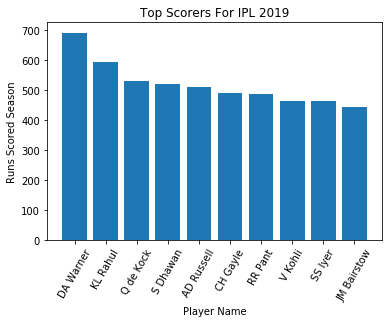

In [171]:
plt.title('Top Scorers For IPL 2019')
plt.ylabel('Runs Scored Season')
plt.xlabel('Player Name')
plt.xticks(rotation=60)
plt.bar(top_ten.index, top_ten['Runs Season'])
plt.show()

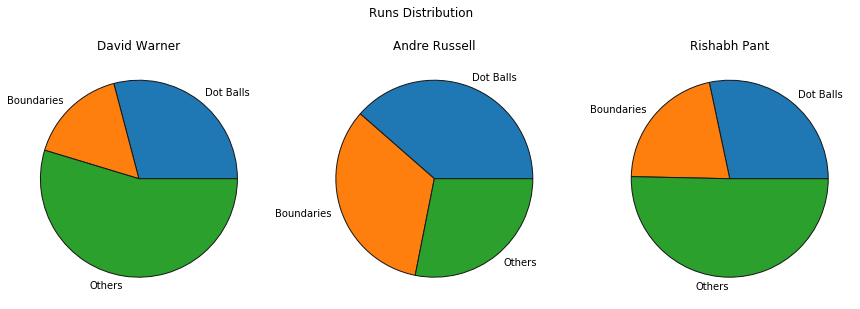

In [175]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Runs Distribution')
columns = ['Dot Ball Percentage', 'Boundary Percentage', 'Others Percentage']
labels = ['Dot Balls', 'Boundaries', 'Others']

ax[0].set_title('David Warner')
ax[0].pie(top_scorers.loc['DA Warner', columns], labels=['Dot Balls', 'Boundaries', 'Others'], wedgeprops={'edgecolor': '#181818'})

ax[1].set_title('Andre Russell')
ax[1].pie(top_scorers.loc['AD Russell', columns], labels=['Dot Balls', 'Boundaries', 'Others'], wedgeprops={'edgecolor': '#181818'})

ax[2].set_title('Rishabh Pant')
ax[2].pie(top_scorers.loc['RR Pant', columns], labels=['Dot Balls', 'Boundaries', 'Others'], wedgeprops={'edgecolor': '#181818'})

plt.show()

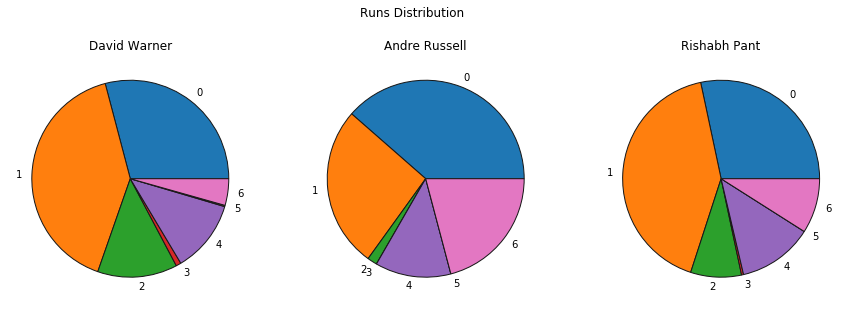

In [173]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Runs Distribution')

columns_two = ['0s', '1s', '2s', '3s', '4s', '5s', '6s']
labels = [0, 1, 2, 3, 4, 5, 6]

ax[0].set_title('David Warner')
ax[0].pie(top_scorers.loc['DA Warner', columns_two], labels=labels, wedgeprops={'edgecolor': '#181818'})

ax[1].set_title('Andre Russell')
ax[1].pie(top_scorers.loc['AD Russell', columns_two], labels=labels, wedgeprops={'edgecolor': '#181818'})

ax[2].set_title('Rishabh Pant')
ax[2].pie(top_scorers.loc['RR Pant', columns_two], labels=labels, wedgeprops={'edgecolor': '#181818'})

plt.show()